In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import torch
from configuration import conf
from utils.data_loader import load_mnist
from models.base import Linear_base_model, Convolutional_base_model
from utils.visualise import *
import numpy as np
trainloader, testloader = load_mnist()

if conf.model_type == 'CNN':
    model = Convolutional_base_model()
elif conf.model_type == 'NN':
    model = Linear_base_model()




model.load_state_dict(torch.load('./ckp/NN/mnist_DE_2.pt'))



<All keys matched successfully>

In [10]:
params = []
with torch.no_grad():
    for i in model.last_layer.parameters():
        params.append(i.detach().numpy())

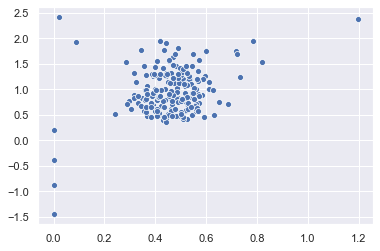

In [11]:
visulise_scatter(params[:2])

In [12]:
np.mean(np.abs(params[0] - params[1]))

0.5289072

In [13]:
model = Linear_base_model()
model.load_state_dict(torch.load('./ckp/NN/mnist_DE_93.06.pt'))
print(model.last_layer.num_distr)

2


In [14]:
params = []
with torch.no_grad():
    for i in model.last_layer.parameters():
        params.append(i.detach().numpy())

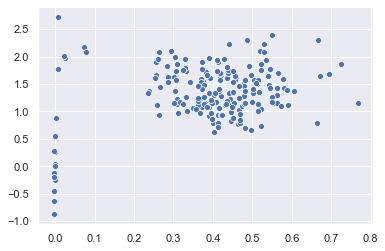

In [15]:
visulise_scatter(params[:2])

In [16]:
np.mean(np.abs(params[0] - params[1]))

0.9646317